<a href="https://colab.research.google.com/github/omarseleem92/flood_susceptibility_mapping/blob/main/RF_2m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Install Geopandas 
!pip install --upgrade geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
## Mount google drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the shapefile
# The shapefile includes 3934 locations, half the locations were obtained from the flood inventory while the other half was generated randomly.
# Flooded = 0 indicates not flooded location while Flooded = 1 indicates flooded location
## Every location has values for the 11 flood predictory features.
df=gpd.read_file("/content/drive/MyDrive/RF_model_Flood_susceptibility/Merged_RF.shp")
df.head()

Flooded    Aspect    CN     Curve       DEM  DTDrainage   DTRiver  \
0        0  0.957001  0.72  0.799850  0.412259    0.008363  0.054802   
1        0  0.470967  0.72  0.800776  0.401485    0.006973  0.078309   
2        0  0.942324  0.72  0.800335  0.412341    0.009118  0.104160   
3        0  0.994332  0.72  0.799277  0.439112    0.017643  0.094123   
4        0  0.076357  0.72  0.799542  0.418952    0.006865  0.090165   

     DTRoad      Freq  Rainfall     Slope       TWI  \
0  0.020846  0.466105  0.164432  0.016718  0.164849   
1  0.008858  0.627576  0.255468  0.091135  0.210387   
2  0.025825  0.705864  0.299589  0.067785  0.164357   
3  0.024873  0.729333  0.349291  0.025067  0.173485   
4  0.007769  0.734826  0.290722  0.010006  0.263441   

                                 geometry  
0  POINT Z (382966.170 5814691.564 0.000)  
1  POINT Z (383336.587 5814598.960 0.000)  
2  POINT Z (383759.922 5814559.272 0.000)  
3  POINT Z (384170.026 5814572.501 0.000)  
4  POINT Z (384474.298 5814612.189 0.000)

In [ ]:
print(df.describe().T)  #Values are already normalized in GIS before fitting. 

             count      mean       std       min       25%       50%  \
Flooded     3934.0  0.500000  0.500064  0.000000  0.000000  0.500000   
Aspect      3934.0  0.490472  0.299935  0.000000  0.230686  0.494488   
CN          3934.0  0.765074  0.054014  0.580000  0.720000  0.770000   
Curve       3934.0  0.799673  0.001490  0.784468  0.799365  0.799630   
DEM         3934.0  0.326524  0.053403  0.248286  0.283137  0.299461   
DTDrainage  3934.0  0.016004  0.025404  0.000000  0.004649  0.007977   
DTRiver     3934.0  0.069707  0.049146  0.000000  0.026939  0.061735   
DTRoad      3934.0  0.013727  0.013888  0.000000  0.005493  0.011653   
Freq        3934.0  0.523706  0.204706  0.079168  0.376067  0.540465   
Rainfall    3934.0  0.408745  0.202367  0.036162  0.221126  0.427292   
Slope       3934.0  0.025746  0.047224  0.000000  0.007828  0.014431   
TWI         3934.0  0.223363  0.069369  0.041362  0.173229  0.207372   

                 75%       max  
Flooded     1.000000  1.000000

In [ ]:
## Check if there is null values
print(df.isnull().sum())
#df = df.dropna()

Flooded       0
Aspect        0
CN            0
Curve         0
DEM           0
DTDrainage    0
DTRiver       0
DTRoad        0
Freq          0
Rainfall      0
Slope         0
TWI           0
geometry      0
dtype: int64


In [ ]:
df = df.rename(columns={'Flooded':'Label'})
print(df.dtypes)

Label            int64
Aspect         float64
CN             float64
Curve          float64
DEM            float64
DTDrainage     float64
DTRiver        float64
DTRoad         float64
Freq           float64
Rainfall       float64
Slope          float64
TWI            float64
geometry      geometry
dtype: object


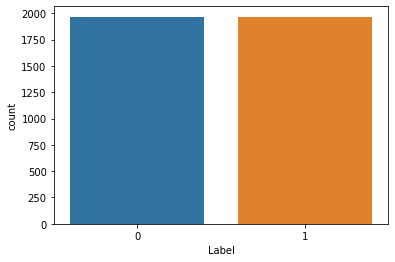

In [ ]:
#Understand the data 
# The dataset includes the same number of flooded and not flooded locations
sns.countplot(x="Label", data=df) #0 - Notflooded   1 - Flooded

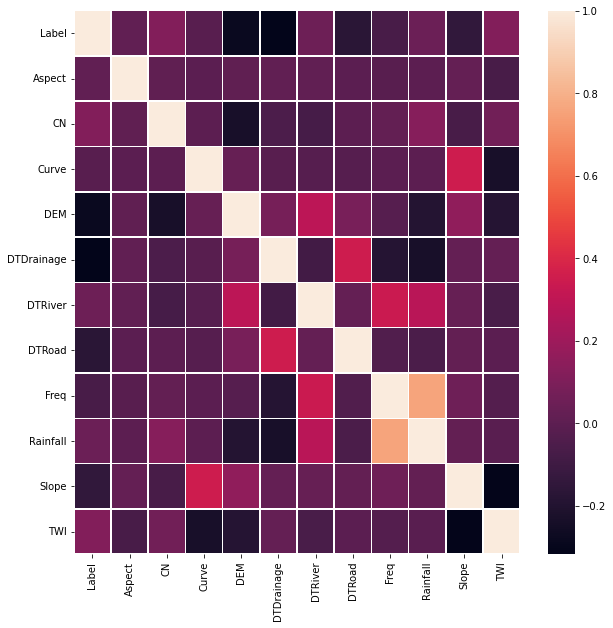

In [ ]:
# Correlation between the input features

corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(corrMatrix, annot=False, linewidths=.5, ax=ax)

In [ ]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values


In [ ]:
#Define the independent variables. 
X = df.drop(labels = ["Label",'geometry'], axis=1) 
features_list = list(X.columns)  #List features so we can rank them later.
#from sklearn.preprocessing import normalize
# Only needed if the data was not normalized
#X = normalize(X, axis=1)

In [ ]:
# the independent variables
X

Aspect    CN     Curve       DEM  DTDrainage   DTRiver    DTRoad  \
0     0.957001  0.72  0.799850  0.412259    0.008363  0.054802  0.020846   
1     0.470967  0.72  0.800776  0.401485    0.006973  0.078309  0.008858   
2     0.942324  0.72  0.800335  0.412341    0.009118  0.104160  0.025825   
3     0.994332  0.72  0.799277  0.439112    0.017643  0.094123  0.024873   
4     0.076357  0.72  0.799542  0.418952    0.006865  0.090165  0.007769   
...        ...   ...       ...       ...         ...       ...       ...   
3929  0.388047  0.72  0.799542  0.396425    0.012825  0.127760  0.009355   
3930  0.142494  0.81  0.799806  0.371613    0.003333  0.164813  0.010987   
3931  0.666879  0.81  0.799850  0.360921    0.003465  0.163731  0.011653   
3932  0.982427  0.81  0.799057  0.369327    0.002950  0.171007  0.011123   
3933  0.501355  0.72  0.799277  0.394303    0.022589  0.151540  0.014842   

          Freq  Rainfall     Slope       TWI  
0     0.466105  0.164432  0.016718  0.164849  
1     0.627576  0.255468  0.091135  0.210387  
2     0.705864  0.299589  0.067785  0.164357  
3     0.729333  0.349291  0.025067  0.173485  
4     0.734826  0.290722  0.010006  0.263441  
...        ...       ...       ...       ...  
3929  0.114188  0.092143  0.008882  0.232116  
3930  0.318662  0.178534  0.013349  0.171602  
3931  0.302372  0.198849  0.012433  0.173735  
3932  0.299590  0.176342  0.004053  0.294096  
3933  0.231982  0.175280  0.000895  0.273471  

[3934 rows x 11 columns]

In [ ]:
# the dependent variable
Y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Split data into train, validation and test to verify accuracy after fitting the model. 
# Firstly split the data into train_validation and test datasets then split the train_validation dataset into train and validation datasets.
# The training dataset is used to train the model, the validation dataset is used for hyperparamter tuning and the testing dataset is used to test the model.
# It is recommended to test the model with a data that the model hasn't seen in the training process
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, random_state=42)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)

In [ ]:
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Model prediction
prediction = model.predict(X_test)

In [ ]:
# Prediction are 1 (Flooded) and 0 (Not flooded)
prediction 

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


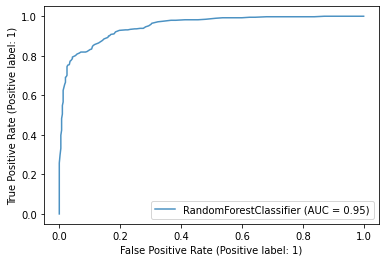

In [ ]:
# Draw the Receiver Operating Characteristics and estimate the Area under the curve (AUC)
# for more information about the AUC, please see https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

from sklearn.metrics import plot_roc_curve

ax = plt.gca()
model_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


In [ ]:
# In order to map the flood susceptibility, we need to predict the flood susceptibility (probability between 0 and 1)
prediction_prob=model.predict_proba(X_test)

In [ ]:
# The probability of being not flooded and flooded for every location ( Their summation equals 1)
prediction_prob

array([[0.05, 0.95],
       [0.88, 0.12],
       [0.33, 0.67],
       ...,
       [0.  , 1.  ],
       [0.64, 0.36],
       [0.  , 1.  ]])

In [ ]:
ls=prediction_prob[:,1]
ls.shape

(787,)

In [ ]:
# As flood susceptibility is classification problem (flooded or not flooded), we can calculate some additional performance indices
from sklearn.metrics import classification_report
target_names=["Not Flooded","Flooded"]
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

 Not Flooded       0.84      0.89      0.87       395
     Flooded       0.89      0.83      0.86       392

    accuracy                           0.86       787
   macro avg       0.87      0.86      0.86       787
weighted avg       0.87      0.86      0.86       787



In [ ]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, prediction))


0.7280167694300268


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[353  42]
 [ 65 327]]


In [ ]:
#importances = list(model_RF.feature_importances_)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

DEM           0.174355
DTDrainage    0.155009
DTRoad        0.123513
DTRiver       0.111450
Freq          0.098538
Rainfall      0.092725
TWI           0.060701
Curve         0.059290
Slope         0.045487
Aspect        0.039515
CN            0.039418
dtype: float64


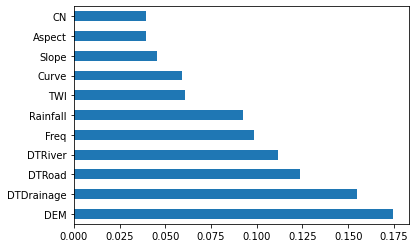

In [ ]:
feature_imp.plot.barh()

# Berlin

In [ ]:
!pip3 install pickle5
import pickle5 as pickle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
with open('/content/drive/MyDrive/RF_model_Flood_susceptibility/district_2_RF_2m.pkl', "rb") as fh:
  df = pickle.load(fh)


In [ ]:
df.head()

VALUE    Aspect    CN       DEM  DTDrainage   DTRiver    DTRoad  \
0  34.580002  0.523138  0.81  0.282316    0.002574  0.033522  0.007252   
1  34.580002  0.510413  0.81  0.282224    0.003075  0.033429  0.007729   
2  34.580002  0.500386  0.81  0.282241    0.002925  0.033522  0.006224   
3  34.590000  0.292593  0.81  0.282350    0.003793  0.033244  0.009160   
4  34.570000  0.431156  0.81  0.282189    0.003590  0.033337  0.007593   

       Freq     Slope       TWI     Curve  Rainfall  \
0  0.510442  0.009681  0.215963  0.799423  0.623310   
1  0.510442  0.005916  0.250464  0.799536  0.623310   
2  0.510442  0.005322  0.229668  0.799595  0.623310   
3  0.510741  0.016196  0.261043  0.799455  0.623741   
4  0.510442  0.003926  0.328652  0.799533  0.623310   

                         geometry  
0  POINT (389893.708 5818773.972)  
1  POINT (389893.708 5818771.972)  
2  POINT (389895.708 5818771.972)  
3  POINT (389891.708 5818769.972)  
4  POINT (389893.708 5818769.972)

In [ ]:
X_hotspot0= df.drop(labels = ["geometry",'VALUE'], axis=1) 
X_hotspot0.head()

Aspect    CN       DEM  DTDrainage   DTRiver    DTRoad      Freq  \
0  0.523138  0.81  0.282316    0.002574  0.033522  0.007252  0.510442   
1  0.510413  0.81  0.282224    0.003075  0.033429  0.007729  0.510442   
2  0.500386  0.81  0.282241    0.002925  0.033522  0.006224  0.510442   
3  0.292593  0.81  0.282350    0.003793  0.033244  0.009160  0.510741   
4  0.431156  0.81  0.282189    0.003590  0.033337  0.007593  0.510442   

      Slope       TWI     Curve  Rainfall  
0  0.009681  0.215963  0.799423  0.623310  
1  0.005916  0.250464  0.799536  0.623310  
2  0.005322  0.229668  0.799595  0.623310  
3  0.016196  0.261043  0.799455  0.623741  
4  0.003926  0.328652  0.799533  0.623310

In [ ]:
cols=X.columns
cols

Index(['Aspect', 'CN', 'Curve', 'DEM', 'DTDrainage', 'DTRiver', 'DTRoad',
       'Freq', 'Rainfall', 'Slope', 'TWI'],
      dtype='object')

In [ ]:
X_hotspot0=X_hotspot0[cols]
X_hotspot0.head()

Aspect    CN     Curve       DEM  DTDrainage   DTRiver    DTRoad  \
0  0.523138  0.81  0.799423  0.282316    0.002574  0.033522  0.007252   
1  0.510413  0.81  0.799536  0.282224    0.003075  0.033429  0.007729   
2  0.500386  0.81  0.799595  0.282241    0.002925  0.033522  0.006224   
3  0.292593  0.81  0.799455  0.282350    0.003793  0.033244  0.009160   
4  0.431156  0.81  0.799533  0.282189    0.003590  0.033337  0.007593   

       Freq  Rainfall     Slope       TWI  
0  0.510442  0.623310  0.009681  0.215963  
1  0.510442  0.623310  0.005916  0.250464  
2  0.510442  0.623310  0.005322  0.229668  
3  0.510741  0.623741  0.016196  0.261043  
4  0.510442  0.623310  0.003926  0.328652

In [ ]:
print(X_hotspot0.isnull().sum())


Aspect        0
CN            0
Curve         0
DEM           0
DTDrainage    0
DTRiver       0
DTRoad        0
Freq          0
Rainfall      0
Slope         0
TWI           0
dtype: int64


In [ ]:
X_hotspot0 = X_hotspot0.dropna()

In [ ]:
df=df.dropna()

In [ ]:
prediction_prob=model.predict_proba(X_hotspot0)

In [ ]:
prediction_prob

array([[0.1 , 0.9 ],
       [0.08, 0.92],
       [0.09, 0.91],
       ...,
       [0.87, 0.13],
       [0.9 , 0.1 ],
       [0.87, 0.13]])

In [ ]:
ls_hotspot0=prediction_prob[:,1]
ls_hotspot0

array([0.9 , 0.92, 0.91, ..., 0.13, 0.1 , 0.13])

In [ ]:
df['FSM']=ls_hotspot0
df.head()


VALUE    Aspect    CN       DEM  DTDrainage   DTRiver    DTRoad  \
0  34.580002  0.523138  0.81  0.282316    0.002574  0.033522  0.007252   
1  34.580002  0.510413  0.81  0.282224    0.003075  0.033429  0.007729   
2  34.580002  0.500386  0.81  0.282241    0.002925  0.033522  0.006224   
3  34.590000  0.292593  0.81  0.282350    0.003793  0.033244  0.009160   
4  34.570000  0.431156  0.81  0.282189    0.003590  0.033337  0.007593   

       Freq     Slope       TWI     Curve  Rainfall  \
0  0.510442  0.009681  0.215963  0.799423  0.623310   
1  0.510442  0.005916  0.250464  0.799536  0.623310   
2  0.510442  0.005322  0.229668  0.799595  0.623310   
3  0.510741  0.016196  0.261043  0.799455  0.623741   
4  0.510442  0.003926  0.328652  0.799533  0.623310   

                         geometry   FSM  
0  POINT (389893.708 5818773.972)  0.90  
1  POINT (389893.708 5818771.972)  0.92  
2  POINT (389895.708 5818771.972)  0.91  
3  POINT (389891.708 5818769.972)  0.92  
4  POINT (389893.708 5818769.972)  0.93

In [ ]:
! pip install geocube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geocube
from geocube.api.core import make_geocube

geo_grid = make_geocube(
    vector_data=df,
    measurements=['FSM'],
    resolution=(-2, 2)
)

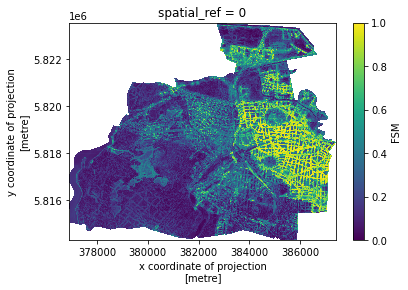

In [ ]:
geo_grid.FSM.plot()

In [ ]:
geo_grid.FSM.rio.to_raster("FSM.tif")
